<h1 align='center'> Os 7 Países com Mais Medalhas de Ouro nas Olimpiadas </h1>

### Integrantes:

- Alexander Haug - RA00360638
- Carlos Calil - RA00359230
- Carlos Braga - RA 00360635
- Felipe - RA 003606547
- Matheus Campos Amorim - RA00361482
- Pedro Carvalho - RA00360239
- Rafael Farias Feitosa - RA00362746

### Tabela de Funções

<img src="images/table.png" width="500"/>

### /Imports

#### Seção reservada para os imports de bibliotecas.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### /Styles

#### Seção reservada para o dicionário de cores para o gráfico principal e a fonte dos gráficos.

In [33]:
cores = {
    'usa' : '#191970',
    'urs' : '#8B0000',
    'ger' : '#FF9C00',
    'gbr' : '#808080',
    'ita' : '#009246',
    'fra' : '#003366',
    'chn' : "#B22222"
}

path = "fonts/Barlow-Medium.ttf"
prop = fm.FontProperties(fname = path)

### /Utils

#### Seção Reservada para as funções que usaremos no código.

In [34]:
def getGoldbySports(df, noc): # Faz o filtro dos esportes com mais medalhas de ouro do pais.
    df_winners = df[(df['NOC'] == noc) & (df['Medal'] == 'Gold')]

    df_winners = df_winners.drop_duplicates(subset=['NOC', 'Games', 'Sport', 'Event'])  

    df_sports = df_winners.groupby('Sport')['Medal'].count()
    df_sports = df_sports.sort_values(ascending=False)
    df_sports = df_sports.reset_index()
    return df_sports.head(3)


def getTopSports(df):
    top3 = df.head(3)['Sport'].tolist()     # Função responsável por transformar os nomes da coluna 'Sport' em valores do eixo x
    return top3

def getTotalMedal(df):
    total3_medal = df.head(3)['Medal'].tolist() # Função responsável por transformar a quantidade de medalhas de ouro, de cada esporte, em valores do eixo y.
    return total3_medal

def formatar_valor(pct, allvals):
    total = sum(allvals)                    # Transforma a porcentagem de cada pedaço da pizza em valor absoluto.
    valor = int(round(pct * total / 100.0))
    return f'{valor}'

### Gráfico Principal

#### Construção do Gráfico

Em primeiro lugar, iremos ler o arquivo .csv, para termos acessos aos dados crus

In [35]:
df_athletes = pd.read_csv("data/athlete_events.csv") # associa a tabela a variável "df_athletes"

Após isso, faremos a limpeza dos dados para que possamos ter acesso apenas as informações que desejamos, cujo quais nesse caso serão a quantidade de medalhas de ouro cada país possuí e quais são os 7 que mais possuem.

In [36]:
df_athletes_clean = df_athletes[df_athletes['Medal'].isin(['Gold', 'Silver', 'Bronze'])] # passo necessário para retirada de linhas de atletas que não conquistaram nenhuma medalha
df_athletes_clean.loc[:, 'NOC'] = df_athletes_clean['NOC'].replace({ # unificando a alemanha ocidental e alemanha oriental em um unico noc
    'GDR': 'GER',
    'FRG': 'GER'
})


In [37]:
df_championsregion = df_athletes_clean[df_athletes_clean['Medal'] == 'Gold'] # faz o filtro para apenas medalhas de ouro.

df_championsregion = df_championsregion.drop_duplicates(subset=['Team','NOC', 'Games', 'Year','Sport', 'Event']) #remove duplicadas e faz a junção das medalhas dos esportes coletivos.
qtd_goldregion = df_championsregion.groupby('NOC')['Medal'].count() # realiza a contagem de medalhas de ouro para cada pais.

qtd_goldregion = qtd_goldregion.sort_values(ascending=False) # ordena a lista do maior para o menor.



Agora, com os dados limpos, faremos a montagem do nosso gráfico principal.

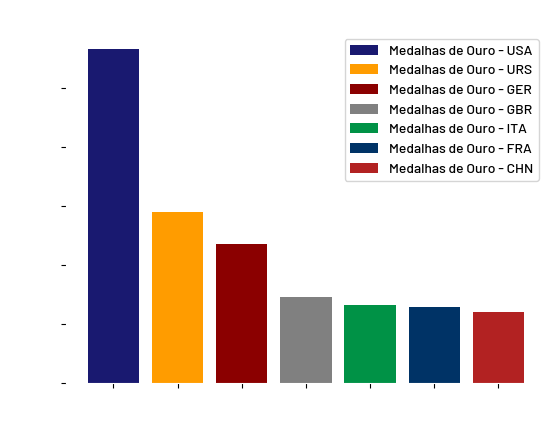

In [38]:
top7 = qtd_goldregion.head(7) # filtramos os sete países com mais medalhas de ouro olímpicas.
y = top7.values # associamos a quantidade de medalhas de ouro ao eixo y
x = top7.index # associamos 

bars = plt.bar(x, y, color=[cores['usa'], cores['ger'], cores['urs'], cores['gbr'], cores['ita'], cores['fra'], cores['chn']])

plt.title('Paises Com Mais Medalhas de Ouro', fontproperties=prop, fontsize=14, color='#ffffff') # Titulo do gráfico principal.

plt.xlabel('Países', fontproperties=prop, color='#ffffff')          # Estilização de fonte e cor dos labels do gráfico.
plt.ylabel('Quantidade de Medalhas de Ouro', fontproperties=prop, color='#ffffff')

plt.xticks(fontproperties=prop, color='#ffffff')    # Estilização de fonte e cor dos valores dos eixos.
plt.yticks(fontproperties=prop, color='#ffffff')


plt.gca().spines['bottom'].set_color('#ffffff')
plt.gca().spines['left'].set_color('#ffffff')
plt.gca().spines['top'].set_color('#ffffff')           # Aqui fizemos a alteração da cor das linhas do quadrante do gráfico, para que ficassem brancas.
plt.gca().spines['right'].set_color('#ffffff')

plt.subplots_adjust(left=0.15, bottom=0.15)   # Ajuste na figura do gráfico.

plt.gca().set_facecolor('none')     # Deixando o fundo da imagem transparente na visualização.
plt.gcf().patch.set_alpha(0)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # posição x centralizada na barra
        height + 1,  # um pouquinho acima do topo da barra
        f'{int(height)}',  # texto com o valor (inteiro)
        ha='center',  # alinhamento horizontal central
        va='bottom',  # alinhamento vertical inferior
        fontsize=8,
        fontproperties=prop,
        color='#ffffff'
    )


plt.legend(
    bars,  # passando a legenda para as barras
    ['Medalhas de Ouro - USA', 'Medalhas de Ouro - URS', 'Medalhas de Ouro - GER',
     'Medalhas de Ouro - GBR', 'Medalhas de Ouro - ITA', 'Medalhas de Ouro - FRA', 'Medalhas de Ouro - CHN'],
    loc='upper right',
    fontsize=6,
    prop=prop
)

plt.savefig('images/main_graph.png', transparent=True) # Exportação do Gráfico
plt.show()

#### Export do Gráfico Principal

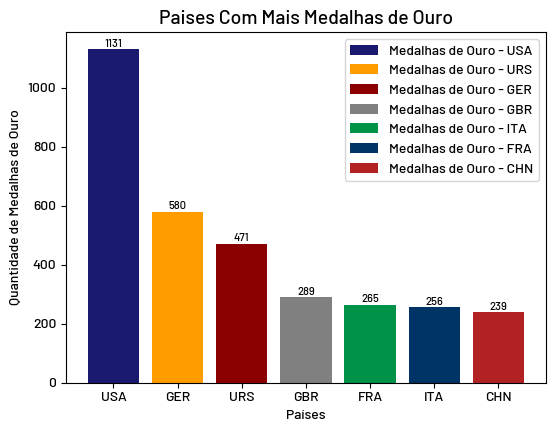

In [39]:
top7 = qtd_goldregion.head(7) # filtramos os sete países com mais medalhas de ouro olímpicas.
y = top7.values # associamos a quantidade de medalhas de ouro ao eixo y
x = top7.index # associamos 

bars = plt.bar(x, y, color=[cores['usa'], cores['ger'], cores['urs'], cores['gbr'], cores['ita'], cores['fra'], cores['chn']])

plt.title('Paises Com Mais Medalhas de Ouro', fontproperties=prop, fontsize=14, color='#000000') # Titulo do gráfico principal.

plt.xlabel('Países', fontproperties=prop, color='#000000')          # Estilização de fonte e cor dos labels do gráfico.
plt.ylabel('Quantidade de Medalhas de Ouro', fontproperties=prop, color='#000000')

plt.xticks(fontproperties=prop, color='#000000')    # Estilização de fonte e cor dos valores dos eixos.
plt.yticks(fontproperties=prop, color='#000000')


plt.gca().spines['bottom'].set_color('#000000')
plt.gca().spines['left'].set_color('#000000')
plt.gca().spines['top'].set_color('#000000')           # Aqui fizemos a alteração da cor das linhas do quadrante do gráfico, para que ficassem brancas.
plt.gca().spines['right'].set_color('#000000')

plt.subplots_adjust(left=0.15, bottom=0.15)   # Ajuste na figura do gráfico.

plt.gca().set_facecolor('none')     # Deixando o fundo da imagem transparente na visualização.
plt.gcf().patch.set_alpha(0)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # posição x centralizada na barra
        height + 1,  # um pouquinho acima do topo da barra
        f'{int(height)}',  # texto com o valor (inteiro)
        ha='center',  # alinhamento horizontal central
        va='bottom',  # alinhamento vertical inferior
        fontsize=8,
        fontproperties=prop,
        color='#000000'
    )


plt.legend(
    bars,  # passando as barras
    ['Medalhas de Ouro - USA', 'Medalhas de Ouro - URS', 'Medalhas de Ouro - GER',
     'Medalhas de Ouro - GBR', 'Medalhas de Ouro - ITA', 'Medalhas de Ouro - FRA', 'Medalhas de Ouro - CHN'],
    loc='upper right',
    fontsize=6,
    prop=prop
)


#plt.savefig('infografico.pdf', transparent=True) # Exportação do Gráfico
plt.show()

### Gráficos dos Esportes com Mais Medalhas de Ouro de Cada País

#### Construção do gráfico de cada país

##### Top #1 - Estados Unidos

In [40]:
df_usawinners = getGoldbySports(df_championsregion, 'USA') # chamada da função que vai retornar os esportes com mais medalhas de ouro

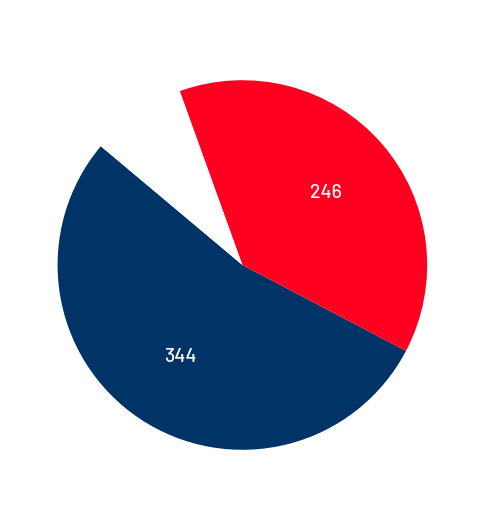

In [56]:
top3_usa = getTopSports(df_usawinners)  # Chama a função que transforma os itens da coluna Sport em uma lista para o gráfico.
labels = top3_usa

total_medal_usa = getTotalMedal(df_usawinners)  # Chama a função que transforma os valores de medalhas em uma lista para o gráfico.
values = total_medal_usa

plt.figure(figsize=(12, 6))
plt.title("Os 3 Esportes com Mais Medalhas de Ouro - EUA", color="#ffffff", fontproperties=prop, fontsize=(16))

wedges, texts, autotexts = plt.pie(values, labels=labels,                                   #Fazemos essa chamada de plot, por conta que queremos personalizar e acrescentar a estilização na fonte do grafico, assim plt.pie retorna cada pedaço da pizza, seu texto e seu valor.
                                   autopct=lambda pct: formatar_valor(pct, values),         #Alterando os valores de porcentagem para os valores de medalhas de cada esporte.
                                   startangle=140,                                          #lambda serve para empacotar o argumento que autopct pede e passa para a função formatar_valor os dois parametros que ela precisa.
                                   colors=['#003366', '#ff0020', '#ffffff'])

for text in texts:
    text.set_fontproperties(prop)
    text.set_color('#ffffff')       # Estilização de cada texto.
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_fontproperties(prop) # Estilização de cada valor.
    autotext.set_color('#ffffff')
    autotext.set_fontsize(14)

plt.gca().set_facecolor('none')    # fundo do gráfico.
plt.gcf().patch.set_alpha(0)       # fundo da figura.
plt.savefig('images/eua-graph.png', transparent=True)

plt.show()

##### Top #2 - Alemanha

In [42]:
df_gerwinners = getGoldbySports(df_championsregion, 'GER')

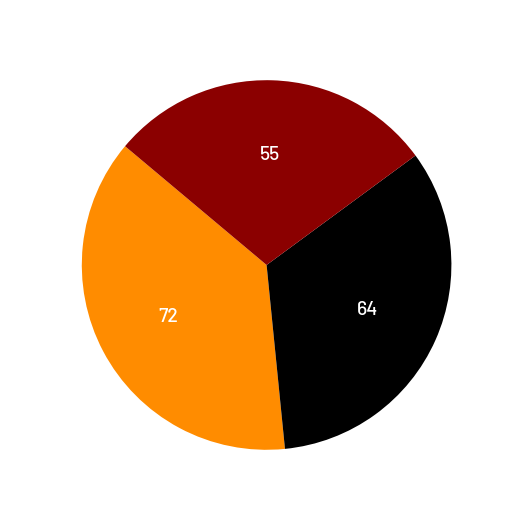

In [57]:
top3_ger = getTopSports(df_gerwinners)
labels = top3_ger

total_medal_ger = getTotalMedal(df_gerwinners)
values = total_medal_ger

plt.figure(figsize=(12, 6))
plt.title("Os 3 Esportes com Mais Medalhas de Ouro - GER", color="#ffffff", fontproperties=prop, fontsize=(16))
wedges, texts, autotexts = plt.pie(values, labels=labels,                                   #Fazemos essa chamada de plot, por conta que queremos personalizar e acrescentar a estilização na fonte do grafico, assim plt.pie retorna cada pedaço da pizza, seu texto e seu valor.
                                   autopct=lambda pct: formatar_valor(pct, values),         #Alterando os valores de porcentagem para os valores de medalhas de cada esporte.
                                   startangle=140,                                          #lambda serve para empacotar o argumento que autopct pede e passa para a função formatar_valor os dois parametros que ela precisa.
                                   colors=['#FF8C00', '#000000', '#8B0000'])

for text in texts:
    text.set_fontproperties(prop)
    text.set_color('#ffffff')
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_fontproperties(prop)
    autotext.set_color('#ffffff')
    autotext.set_fontsize(14)

plt.gca().set_facecolor('none') 
plt.gcf().patch.set_alpha(0) 
plt.savefig('images/ger-graph.png', transparent=True)

plt.show()

##### Top #3 - União Soviética

In [44]:
df_urswinners = getGoldbySports(df_championsregion, 'URS')

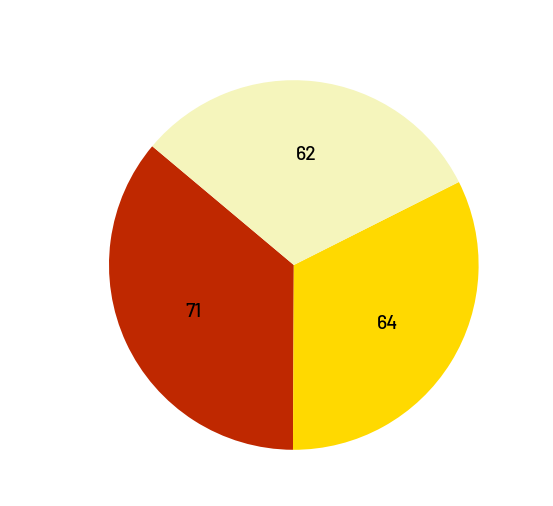

In [54]:
top3_urs = getTopSports(df_urswinners)
labels = top3_urs

total_medal_urs = getTotalMedal(df_urswinners)
values = total_medal_urs

plt.figure(figsize=(12, 6))
plt.title("Os 3 Esportes com Mais Medalhas de Ouro - URS", color="#ffffff", fontproperties=prop, fontsize=(16))
wedges, texts, autotexts = plt.pie(values, labels=labels,                                   #Fazemos essa chamada de plot, por conta que queremos personalizar e acrescentar a estilização na fonte do grafico, assim plt.pie retorna cada pedaço da pizza, seu texto e seu valor.
                                   autopct=lambda pct: formatar_valor(pct, values),         #Alterando os valores de porcentagem para os valores de medalhas de cada esporte.
                                   startangle=140,                                          #lambda serve para empacotar o argumento que autopct pede e passa para a função formatar_valor os dois parametros que ela precisa.
                                   colors=['#bf2800', '#ffd900', '#f5f5bc'])

for text in texts:
    text.set_fontproperties(prop)
    text.set_color('#ffffff')
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_fontproperties(prop)
    autotext.set_color('#000000')
    autotext.set_fontsize(14)
    
plt.gca().set_facecolor('none')
plt.gcf().patch.set_alpha(0)
plt.savefig('images/urs_graph.png', transparent=True)

plt.show()

##### Top #4 - Grã Bretanha

In [46]:
df_gbrwinners = getGoldbySports(df_championsregion, 'GBR')

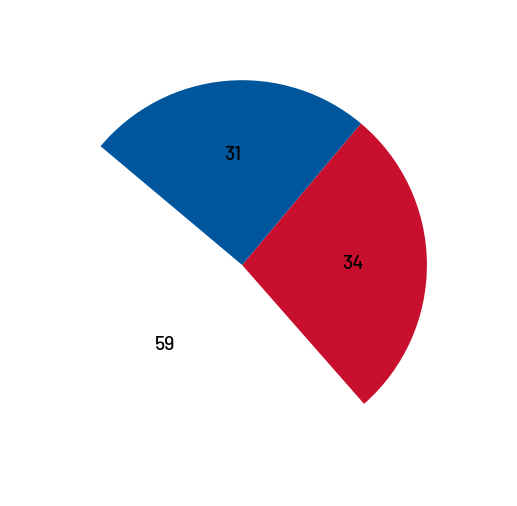

In [47]:
top3_gbr = getTopSports(df_gbrwinners)
labels = top3_gbr

total_medal_gbr = getTotalMedal(df_gbrwinners)
values = total_medal_gbr

plt.figure(figsize=(12, 6))
plt.title("Os 3 Esportes com Mais Medalhas de Ouro - GBR", color="#ffffff", fontproperties=prop, fontsize=(16))
wedges, texts, autotexts = plt.pie(values, labels=labels,                                   #Fazemos essa chamada de plot, por conta que queremos personalizar e acrescentar a estilização na fonte do grafico, assim plt.pie retorna cada pedaço da pizza, seu texto e seu valor.
                                   autopct=lambda pct: formatar_valor(pct, values),         #Alterando os valores de porcentagem para os valores de medalhas de cada esporte.
                                   startangle=140,                                          #lambda serve para empacotar o argumento que autopct pede e passa para a função formatar_valor os dois parametros que ela precisa.
                                   colors=['#ffffff', '#c8102e', '#00569d'])

for text in texts:
    text.set_fontproperties(prop)
    text.set_color('#ffffff')
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_fontproperties(prop)
    autotext.set_color('#000000')
    autotext.set_fontsize(14)

plt.gca().set_facecolor('none')    
plt.gcf().patch.set_alpha(0) 
plt.savefig('images/gbr-graph.png', transparent=True)

plt.show()

##### Top #5 - Italia

In [48]:
df_itawinners = getGoldbySports(df_championsregion, 'ITA')

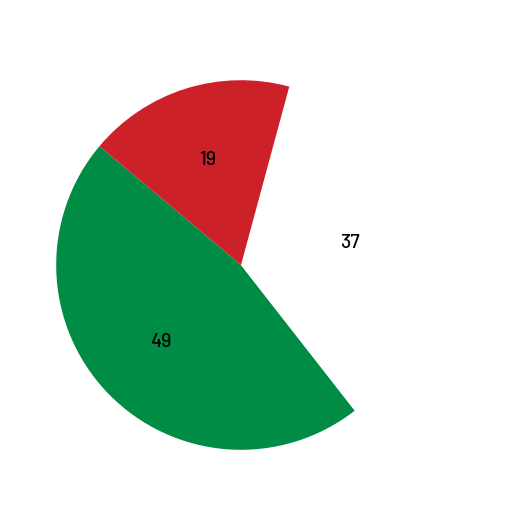

In [49]:
top3_ita = getTopSports(df_itawinners)
labels = top3_ita

total_medal_ita = getTotalMedal(df_itawinners)
values = total_medal_ita

plt.figure(figsize=(12, 6))
plt.title("Os 3 Esportes com Mais Medalhas de Ouro - ITA", color="#ffffff", fontproperties=prop, fontsize=(16))
wedges, texts, autotexts = plt.pie(values, labels=labels,                                   #Fazemos essa chamada de plot, por conta que queremos personalizar e acrescentar a estilização na fonte do grafico, assim plt.pie retorna cada pedaço da pizza, seu texto e seu valor.
                                   autopct=lambda pct: formatar_valor(pct, values),         #Alterando os valores de porcentagem para os valores de medalhas de cada esporte.
                                   startangle=140,                                          #lambda serve para empacotar o argumento que autopct pede e passa para a função formatar_valor os dois parametros que ela precisa.
                                   colors=['#008c45', '#ffffff', '#cd212a'])

for text in texts:
    text.set_fontproperties(prop)
    text.set_color('#ffffff')
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_fontproperties(prop)
    autotext.set_color('#000000')
    autotext.set_fontsize(14)

plt.gca().set_facecolor('none')    
plt.gcf().patch.set_alpha(0)       
plt.savefig('images/ita-graph.png', transparent=True)

plt.show()

##### Top #6 - França

In [50]:
df_frawinners = getGoldbySports(df_championsregion, 'FRA')

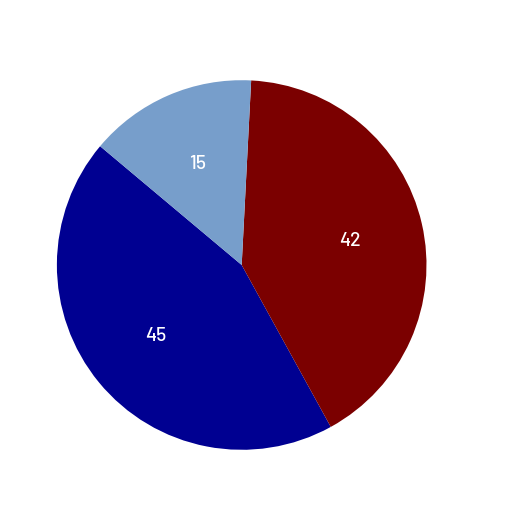

In [51]:
top3_fra = getTopSports(df_frawinners)
labels = top3_fra

total_medal_fra = getTotalMedal(df_frawinners)
values = total_medal_fra

plt.figure(figsize=(12, 6))
plt.title("Os 3 Esportes com Mais Medalhas de Ouro - FRA", color="#ffffff", fontproperties=prop, fontsize=(16))
wedges, texts, autotexts = plt.pie(values, labels=labels,                                   #Fazemos essa chamada de plot, por conta que queremos personalizar e acrescentar a estilização na fonte do grafico, assim plt.pie retorna cada pedaço da pizza, seu texto e seu valor.
                                   autopct=lambda pct: formatar_valor(pct, values),         #Alterando os valores de porcentagem para os valores de medalhas de cada esporte.
                                   startangle=140,                                          #lambda serve para empacotar o argumento que autopct pede e passa para a função formatar_valor os dois parametros que ela precisa.
                                   colors=['#000091', '#7b0000', '#779ecb'])

for text in texts:
    text.set_fontproperties(prop)
    text.set_color('#ffffff')
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_fontproperties(prop)
    autotext.set_color('#ffffff')
    autotext.set_fontsize(14)

plt.gca().set_facecolor('none') 
plt.gcf().patch.set_alpha(0)      
plt.savefig('images/fra-graph.png', transparent=True)

plt.show()

##### Top #7 - China

In [52]:
df_chnwinners = getGoldbySports(df_championsregion, 'CHN')

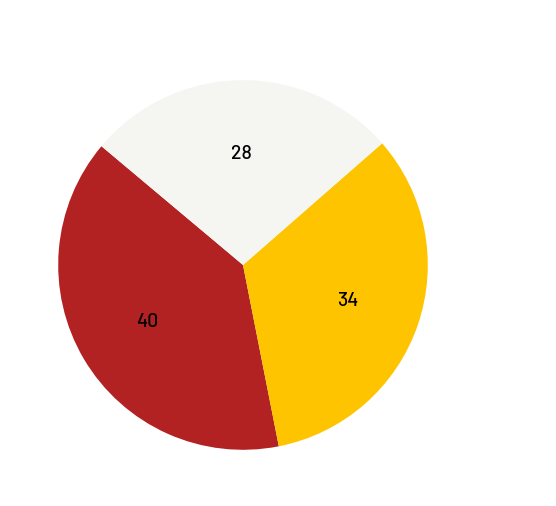

In [53]:
top3_chn = getTopSports(df_chnwinners)
labels = top3_chn

total_medal_chn = getTotalMedal(df_chnwinners)
values = total_medal_chn

plt.figure(figsize=(12, 6))
plt.title("Os 3 Esportes com Mais Medalhas de Ouro - CHN", color="#ffffff", fontproperties=prop, fontsize=(16))
wedges, texts, autotexts = plt.pie(values, labels=labels,                                   #Fazemos essa chamada de plot, por conta que queremos personalizar e acrescentar a estilização na fonte do grafico, assim plt.pie retorna cada pedaço da pizza, seu texto e seu valor.
                                   autopct=lambda pct: formatar_valor(pct, values),         #Alterando os valores de porcentagem para os valores de medalhas de cada esporte.
                                   startangle=140,                                          #lambda serve para empacotar o argumento que autopct pede e passa para a função formatar_valor os dois parametros que ela precisa.
                                   colors=['#B22222', '#FFC400', '#f5f5f2'])

for text in texts:
    text.set_fontproperties(prop)
    text.set_color('#ffffff')
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_fontproperties(prop)
    autotext.set_color('#000000')
    autotext.set_fontsize(14)

plt.gca().set_facecolor('none')  
plt.gcf().patch.set_alpha(0)   
plt.savefig('images/chn-graph.png', transparent=True)

plt.show()

### Bibliografia Canva

#### Bibliografia USA

Olympics.com - História do Atletismo e da Natação nos EUA

NCAA Official Site

Pew Research Center - Cultura das armas nos EUA

US Olympic & Paralympic Committee - Estrutura e Suporte

USOPC Annual Reports

Olympic Channel Biographies

#### Bibliografia GER

MÜLLER, Norbert; SCHWANK, Mario. The German Sports System: Its Structure and Development. International Journal of Sport Policy and Politics, v. 5, n. 3, p. 409–427, 2013.

KRÜGER, Arnd. Germany: The Development of Sport and Physical Education in East and West. International Journal of the History of Sport, v. 8, n. 1, p. 5–28, 1991.

FRANKEN, Norbert; HARDENACKE, Wolfgang. Sportwissenschaft in Deutschland. Deutsche Zeitschrift für Sportmedizin, v. 53, n. 1, p. 1–5, 2002.

HOBERMAN, John. Sport and Political Ideology in the Postwar Germanies. Journal of Sport History, v. 11, n. 3, p. 5–27, 1984.

PÜHSE, Uwe; GERBER, Markus. International Comparison of Physical Education: Concepts, Problems, Prospects. Aachen: Meyer & Meyer Sport, 2005.

#### Bibliografia URS

"The Political Instrumentalization of Sport in the USSR" – Journal of Sport History

"Soviet Wrestling and the Sambo Movement" – International Wrestling Database

"Soviet Sport and Soviet Society: Propaganda through Physical Culture" – European Journal of Physical Education

"Training Systems in Soviet Gymnastics" – International Gymnastics Federation Reports

"Sport, Politics and the Soviet Union" – Oxford Research Encyclopedia

"The East German and Soviet Doping Systems" – Journal of Sports Medicine

#### Bibliografia GBR

theguardian.com/sport/article/2024

uksport-newsroom.prgloo.com/news/uk-sport-says-we-are-ready-for-la-cycle-as-it-announces-greatest-investment-to-date-towards-powering-success-and-inspiring-impact

uksport.gov.uk/our-work/investing-in-sport/current-funding-awards

#### Bibliografia ITA

Comitê Olímpico Italiano (CONI)
Site oficial do Comitê Olímpico Italiano – lista de medalhistas olímpicos por esporte e edição.
coni.it

Olympedia (banco de dados de estatísticas olímpicas usado por historiadores)
Perfil de Ugo Frigerio, Marcell Jacobs e atletas de ciclismo e atletismo.
olympedia.org

World Athletics (federação internacional de atletismo)
Resultados oficiais de provas olímpicas de atletismo.
worldathletics.org 


#### Bibliografia FRA

cnosf.franceolympique

fie.org/fie

britannica.com/sports/Tour-de-France 

#### Bibliografia CHN

"Why China Dominates Table Tennis" – The Economist

"China’s Weightlifting Supremacy: Talent and Training" – BBC Sport

"Inside China's Diving Dynasty" – New York Times

"State-Sponsored Training Systems and China's Olympic Success" – International Journal of the History of Sport